Daily event counts
date
2016-01-15    1
2018-12-27    1
2019-02-19    1
2020-01-06    1
2020-01-23    1
2020-01-24    2
2020-01-25    4
2020-01-27    4
2020-01-29    1
2020-02-02    1
2020-02-03    2
2020-02-04    1
2020-02-10    1
2020-02-13    1
2020-02-22    3
2020-02-23    1
2020-02-26    3
2020-02-29    1
2020-03-01    1
2020-03-03    2
2020-03-05    1
2020-03-06    1
2020-03-07    1
2020-03-11    2
2020-03-12    1
2020-03-13    1
2020-03-14    1
2020-03-15    1
2020-03-17    4
2020-03-18    1
2020-03-19    1
2020-03-21    1
2020-03-22    2
2020-03-23    2
2020-03-26    1
2020-03-27    4
2020-03-28    1
2020-04-01    1
2020-04-03    1
2020-04-05    1
2020-04-06    1
2020-04-07    2
2020-04-09    3
2020-04-10    1
2020-04-12    2
2020-04-16    1
2020-04-25    1
dtype: int64

Average daily event count (λ): 1.553191489361702


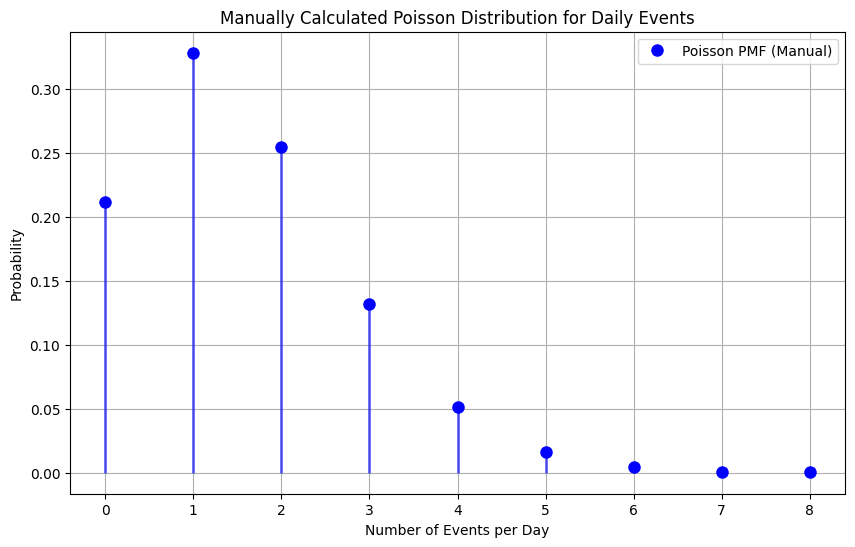

Probability of 0 events in a day: 0.2116
Probability of 1 events in a day: 0.3286
Probability of 2 events in a day: 0.2552
Probability of 3 events in a day: 0.1321
Probability of 4 events in a day: 0.0513
Probability of 5 events in a day: 0.0159
Probability of 6 events in a day: 0.0041
Probability of 7 events in a day: 0.0009
Probability of 8 events in a day: 0.0002


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

file_path = '/Users/hariharanduraisingh/Downloads/jupyter_notebook/CoAID/05-01-2020/NewsFakeCOVID-19.csv'
df = pd.read_csv(file_path)

df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce', utc=True)
df = df.dropna(subset=['publish_date'])
df['date'] = df['publish_date'].dt.date

daily_counts = df.groupby('date').size()
print("Daily event counts")
print(daily_counts)

lambda_val = daily_counts.mean()
print("\nAverage daily event count (λ):", lambda_val)

def poisson_pmf(k, lam):
    return (lam**k * math.exp(-lam)) / math.factorial(k)

max_count = daily_counts.max()
x_values = np.arange(0, max_count + 5)
poisson_manual = [poisson_pmf(k, lambda_val) for k in x_values]

plt.figure(figsize=(10, 6))
plt.plot(x_values, poisson_manual, 'bo', ms=8, label='Poisson PMF (Manual)')
plt.vlines(x_values, 0, poisson_manual, colors='b', lw=2, alpha=0.6)
plt.title('Manually Calculated Poisson Distribution for Daily Events')
plt.xlabel('Number of Events per Day')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

for k, prob in zip(x_values, poisson_manual):
    print(f"Probability of {k} events in a day: {prob:.4f}")
